In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import date
import seaborn as sns

In [2]:
df = pd.read_csv("RELIANCE.csv")

# Task 1

In [3]:
df.info()   # from here it is quite visible that open, close, low, high contain 7 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3350 non-null   object 
 1   Open       3343 non-null   float64
 2   High       3343 non-null   float64
 3   Low        3343 non-null   float64
 4   Close      3343 non-null   float64
 5   Adj Close  3343 non-null   float64
 6   Volume     3343 non-null   float64
dtypes: float64(6), object(1)
memory usage: 183.3+ KB


In [4]:
df[df.Close.isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
24,2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN
502,2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
541,2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN
671,2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN
713,2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN
1050,2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
1279,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# so I will remove all the nulls
df = df.dropna()

In [6]:
df.info() # now all the nulls are removed

<class 'pandas.core.frame.DataFrame'>
Index: 3343 entries, 0 to 3349
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3343 non-null   object 
 1   Open       3343 non-null   float64
 2   High       3343 non-null   float64
 3   Low        3343 non-null   float64
 4   Close      3343 non-null   float64
 5   Adj Close  3343 non-null   float64
 6   Volume     3343 non-null   float64
dtypes: float64(6), object(1)
memory usage: 208.9+ KB


##### So Task 1 is completed. 

# Task 2

In [7]:
# now as i have to train data to 3 months and test to 1 month.
# so i will extract 4 months of data
# i will take from 2023-03-18 to 2023-07-18

df = df[(df.Date > '2023-03-18') & (df.Date < '2023-07-18')]

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
3269,2023-03-20,2215.000000,2220.000000,2180.000000,2201.250000,2201.250000,9010595.0
3270,2023-03-21,2218.949951,2274.000000,2217.000000,2269.699951,2269.699951,9876263.0
3271,2023-03-22,2285.000000,2291.449951,2270.000000,2276.600098,2276.600098,5039622.0
3272,2023-03-23,2268.000000,2269.899902,2243.050049,2247.800049,2247.800049,7499082.0
3273,2023-03-24,2245.250000,2250.000000,2198.000000,2203.300049,2203.300049,5711497.0
...,...,...,...,...,...,...,...
3344,2023-07-11,2752.899902,2770.000000,2737.600098,2764.699951,2764.699951,9262001.0
3345,2023-07-12,2766.300049,2802.000000,2761.649902,2767.750000,2767.750000,8645662.0
3346,2023-07-13,2783.899902,2799.000000,2737.250000,2743.000000,2743.000000,6776172.0
3347,2023-07-14,2750.000000,2760.899902,2725.100098,2740.699951,2740.699951,6979790.0


In [9]:
# I choose Open to predict closing price of the stock.
df = df[['Open','Close']]

In [10]:
df.reset_index(drop = True)

,Open,Close
0,2215.000000,2201.250000
1,2218.949951,2269.699951
2,2285.000000,2276.600098
3,2268.000000,2247.800049
4,2245.250000,2203.300049
...,...,...
75,2752.899902,2764.699951
76,2766.300049,2767.750000
77,2783.899902,2743.000000
78,2750.000000,2740.699951


In [11]:
lr = LinearRegression()

In [12]:
y = df['Close']
x = df['Open']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [13]:
lr.fit(x_train,y_train);

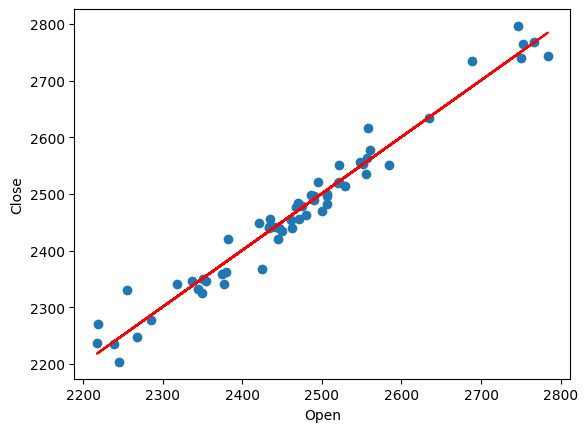

In [14]:
# now we have trained our model
y_pred_train = lr.predict(x_train)
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train,color= 'red')
plt.xlabel("Open")
plt.ylabel("Close");

In [15]:
y_pred_test = lr.predict(x_test)

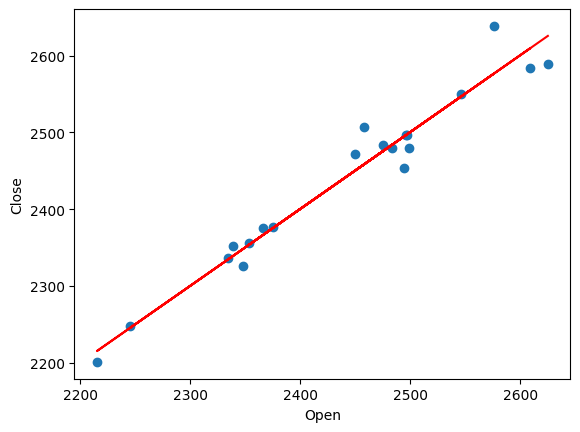

In [16]:
# so y_pred_test is the predicted data and y_test is the actual data
# plotting the predicted vs actual data
plt.plot(x_test,y_pred_test, color='red')
plt.scatter(x_test,y_test)
plt.xlabel("Open")
plt.ylabel('Close');

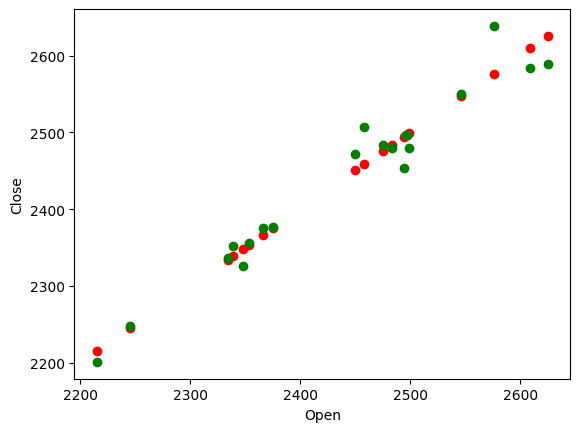

In [17]:
plt.scatter(x_test,y_pred_test, color='red')
plt.scatter(x_test,y_test, color = "green")
plt.xlabel("Open")
plt.ylabel('Close');

In [18]:
# creating a new data frame with 
df2 = pd.DataFrame({
    "Predicted_Close" : y_pred_test,
    "Actual_Close" : y_test
})

In [19]:
df2 = df2.reset_index(drop = True)
df2 = df2.sort_values("Actual_Close").reset_index(drop = True)
df2

,Predicted_Close,Actual_Close
0,2215.427875,2201.250000
1,2245.451380,2248.000000
2,2348.532081,2325.850098
3,2334.521112,2336.350098
4,2339.575117,2352.000000
5,2353.535998,2355.500000
6,2366.546184,2376.050049
7,2375.553235,2377.050049
8,2494.646472,2453.800049
9,2450.611998,2471.899902


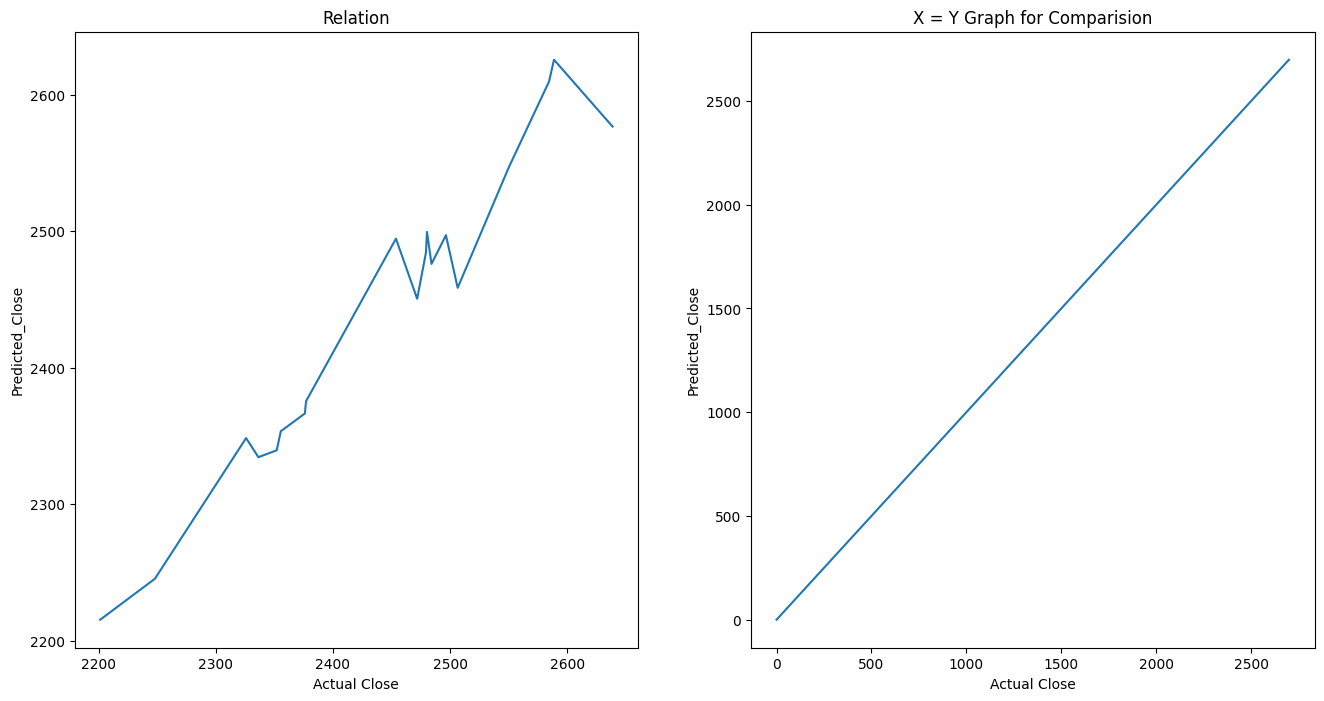

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].plot(df2["Actual_Close"],df2["Predicted_Close"])
axes[0].set_xlabel("Actual Close")
axes[0].set_ylabel("Predicted_Close")
axes[0].set_title('Relation')
x = y = np.array([i for i in range(0,2700)])
axes[1].plot(x,y)
axes[1].set_xlabel("Actual Close")
axes[1].set_ylabel("Predicted_Close")
axes[1].set_title('X = Y Graph for Comparision');